In [150]:
import pandas as pd
import dask.dataframe as dd
import numpy as np

In [7]:
treeDF = dd.read_csv("/home/glentner/public/datasets/fiadb/TREE.csv")

In [94]:
subsetCols = ['CN', 'STATECD', 'SPCD', 'DIA', "HT"]
subsetCols2 = ["HT", "HTCD", "ACTUALHT", 'SPCD', "INVYR"]

In [25]:
df = pd.read_csv('/home/glentner/public/datasets/fiadb/TREE.csv', usecols=subsetCols)

In [95]:
heightDF = pd.read_csv("/home/glentner/public/datasets/fiadb/TREE.csv", usecols=subsetCols2)

In [96]:
heightDF = heightDF.dropna()

In [205]:
heightDF = heightDF.reset_index(drop=True)

#drop na values and reset indexes
#we only care about values that have been measured in this case


In [43]:
from matplotlib import pyplot as plt

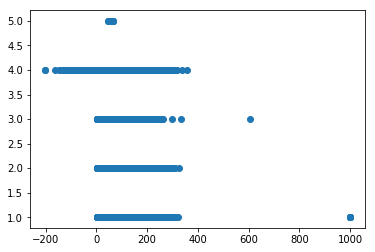

In [46]:
x = heightDF["HT"]
y = heightDF["HTCD"]

plt.scatter(x, y)
plt.show()

In [36]:
heights = heightsDF["HT"]
htcd = heightsDF["HTCD"]

In [200]:
heightDF[heightDF["HT"] < 0]

#here we see that we get some negative values for measured height
# all negative height values were measured via their own "model".
# this could indicate that their model is incorrect


,INVYR,SPCD,HT,HTCD,ACTUALHT
1731113,2000,461,-72.0,4.0,-72.0
1731569,2000,591,-13.0,4.0,-13.0
1732219,2000,971,-29.0,4.0,-29.0
1732396,2000,972,-23.0,4.0,-23.0
1733618,2000,682,-2.0,4.0,-2.0
1734052,2000,971,-24.0,4.0,-24.0
1734243,2000,682,-14.0,4.0,-14.0
1737069,2000,591,-3.0,4.0,-3.0
1737978,2000,971,-6.0,4.0,-6.0
1738404,2000,971,-29.0,4.0,-29.0


In [121]:
speciesDF = pd.read_csv("/home/glentner/public/datasets/fiadb/SPECIES.csv")

In [107]:
heightSubset = heightDF[heightDF["HT"] > 0]
heightSubset = heightSubset[heightSubset["HT"] < 379]

In [108]:
heightDF.columns

Index(['INVYR', 'SPCD', 'HT', 'HTCD', 'ACTUALHT'], dtype='object')

In [109]:
heightSubset = heightSubset[heightSubset["HTCD"] != 5]

In [110]:
uniqueSpecies = heightSubset["SPCD"].unique()

In [112]:
uniqueSpecies[0]

heightSubset[heightSubset["SPCD"] == uniqueSpecies[0]]["HT"].mean()
heightDict = {}
for i in uniqueSpecies:
    heightDict[i] = heightSubset[heightSubset["SPCD"] == i]["HT"].mean()

In [116]:
speciesHeightDF = pd.DataFrame(list(heightDict.items()), columns = ["Specie #", "Mean Height"])

In [143]:
largestDF = speciesHeightDF.nlargest(10, ["Mean Height"])
largestDF
# 357 is real max

,Specie #,Mean Height
257,212,114.170213
270,299,98.755643
1122,7674,95.000000
228,211,94.349645
238,117,90.003955
577,6972,89.500000
325,513,89.319088
279,511,87.000000
524,7163,85.000000
362,7144,83.258621


In [141]:
top10names = ["Giant Sequoia", "Evergreen", "Sapodilla", "Redwood", "Sugar Pine", "Dysoxylum mollissimum",
             "Grand Eucalyptus", "Tasmanian Bluegum", "Ficus Tree", "Peacocksplume"]

In [189]:
speciesDF[speciesDF["SPCD"] == 211]

,SPCD,COMMON_NAME,GENUS,SPECIES,VARIETY,SUBSPECIES,SPECIES_SYMBOL,E_SPGRPCD,W_SPGRPCD,C_SPGRPCD,...,STANDING_DEAD_DECAY_RATIO3,STANDING_DEAD_DECAY_RATIO4,STANDING_DEAD_DECAY_RATIO5,CREATED_BY,CREATED_DATE,CREATED_IN_INSTANCE,MODIFIED_BY,MODIFIED_DATE,MODIFIED_IN_INSTANCE,DRYWT_TO_GREENWT_CONVERSION
1274,211,redwood,Sequoia,sempervirens,NaN,NaN,SESE3,9,16,NaN,...,0.902,0.605,0.605,NaN,2005-02-24,333,NaN,2017-02-16,798795.0,2.036406


Text(0.5,0,'Tree common name')

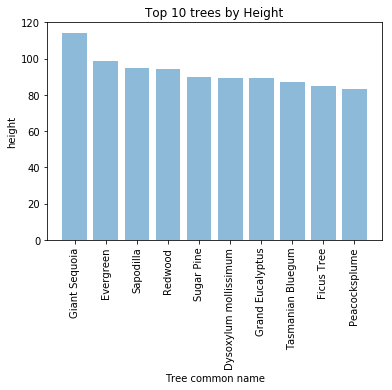

In [203]:
y_pos = np.arange(len(largestDF["Mean Height"]))

plt.bar(y_pos, largestDF["Mean Height"], align='center', alpha=.5)
plt.xticks(y_pos, top10names, rotation = 90)
plt.ylabel("height")
plt.title("Top 10 trees by Height")
plt.xlabel("Tree common name")

In [164]:
redwoodDF = heightDF[heightDF["SPCD"] == 211]

In [179]:
year = {}

for i in range(2001, 2019):
    year[i] = redwoodDF[redwoodDF["INVYR"] == i]["HT"].mean()

In [180]:
#2018
year

{2001: 81.63968253968254,
 2002: 87.60310734463278,
 2003: 94.2809364548495,
 2004: 101.8286937901499,
 2005: 88.73125,
 2006: 93.11670235546039,
 2007: 91.42676767676768,
 2008: 90.19554455445545,
 2009: 99.06818181818181,
 2010: 89.57166392092257,
 2011: 87.6453488372093,
 2012: 90.51949541284404,
 2013: 100.28685258964144,
 2014: 105.45057034220532,
 2015: 97.16641901931649,
 2016: 98.17425083240843,
 2017: 92.85419058553387,
 2018: 96.92289719626169}

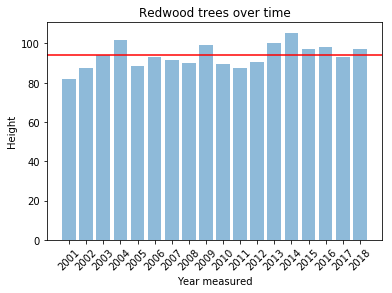

In [202]:
y_pos = np.arange(len(year))

plt.bar(y_pos, year.values(), align='center', alpha=.5)
plt.xticks(y_pos, year.keys(), rotation = 45)
plt.ylabel("Height")
plt.xlabel("Year measured")
plt.title("Redwood trees over time")
plt.axhline(94, color = 'r')

# we were worried that repeat measurements of the same tree over time would affect the data. 
# However, we compared the measurements of a sample tree(redwood) over time and found
# that it did not make a significant difference year to year.
# The plot is roughly centered around the mean.

In [263]:
states = ['AL', "AK", "AZ", "AR", "CA", "CO", "CT", "DE",
         "DC", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS",
         "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO",
         "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND",
         "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX",
         "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

stateDict = {}

for i in range(0, 51):
    subState = df[df["STATECD"] == i]
    
    stateDict[i] = subState["SPCD"].mode()    

In [265]:
# for i in stateDict.keys():
#     print("State Code: " + str(i) + str(stateDict[i][0]))


# #speciesDF[speciesDF["SPCD"] == ]